<a href="https://colab.research.google.com/github/romenmeitei/Coexistence-of-Outermembrane-protein-A-and-Ade-efflux-pump-genes-in-Acinetobacter-baumanni-/blob/main/Coexistence_of_OmpA_and_Ade_Efflux_genes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 1. CLINICAL FEATURES OF THE SAMPLES**



In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/IBSD/Clinical_features.csv'

# Load the CSV file using pandas
import pandas as pd
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


Mounted at /content/drive


,Strain ID,Sex of child,Term/ Preterm,Inborn/ Out born,Birth weight,Mode of delivery,Diagnosis at Admission,Sepsis,Ventilation,Outcome
0,Ab0013,Male,Preterm,In born,LBW,CS,"Preterm with RDS, Hypothermia, Respiratory Dis...",Yes,Yes,Discharged
1,Ab0017,Male,Preterm,In born,VLBW,LUCS,"Preterm LBW, Congenital pneumonia, septicemia",Yes,No Data,Expired
2,Ab0014,Male,Preterm,In born,ELBW,SVD,"Respiratory distress, RDS, Pneumonia, Septic s...",Yes,Yes,No Data
3,Ab0015,Female,Preterm,In born,ELBW,LUCS,"Preterm, low birth weight",Yes,No Data,Discharged
4,Ab0018,Male,Preterm,In born,LBW,CS,No Data,Yes,No Data,No Data


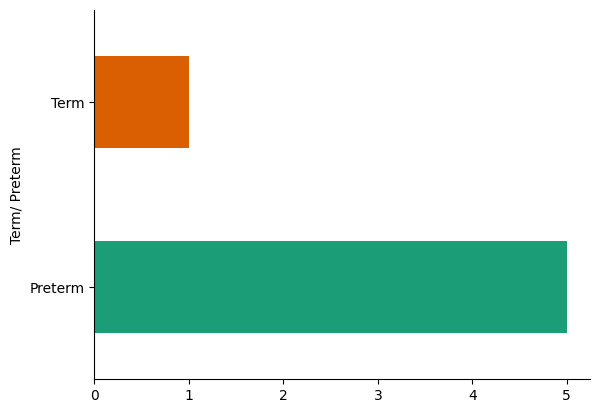

In [4]:
# @title Term/ Preterm

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Term/ Preterm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Percentage of Preterm Delivery

Percentage of Preterm Deliveries: 83.33%


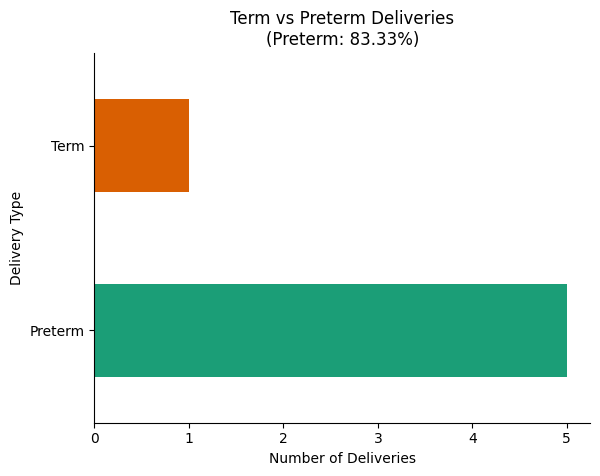

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

# Calculate the total and preterm deliveries
term_counts = data['Term/ Preterm'].value_counts()
total_deliveries = term_counts.sum()
preterm_deliveries = term_counts.get('Preterm', 0)

# Calculate percentage of preterm deliveries
preterm_percentage = (preterm_deliveries / total_deliveries) * 100
print(f"Percentage of Preterm Deliveries: {preterm_percentage:.2f}%")

# Plot the bar chart
data.groupby('Term/ Preterm').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title(f"Term vs Preterm Deliveries\n(Preterm: {preterm_percentage:.2f}%)")
plt.xlabel("Number of Deliveries")
plt.ylabel("Delivery Type")
plt.show()


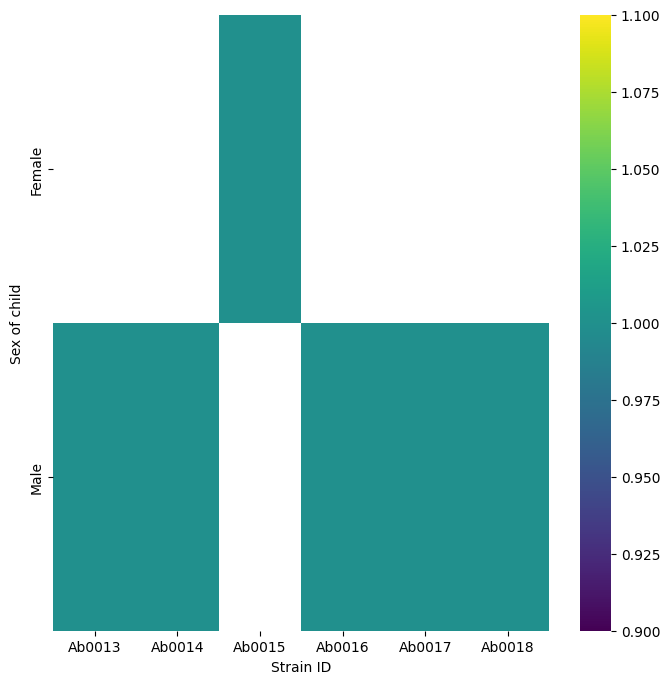

In [2]:
# @title Strain ID vs Sex of child

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex of child'].value_counts()
    for x_label, grp in data.groupby('Strain ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Strain ID')
_ = plt.ylabel('Sex of child')

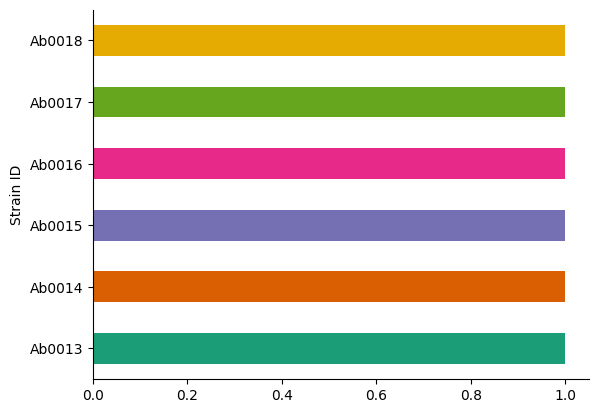

In [ ]:
# @title Strain ID

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Strain ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **PART 2. ANALYSIS OF CLNICAL FEATURES**

<ipython-input-6-d10543e2d75d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Term_Preterm', palette='pastel')


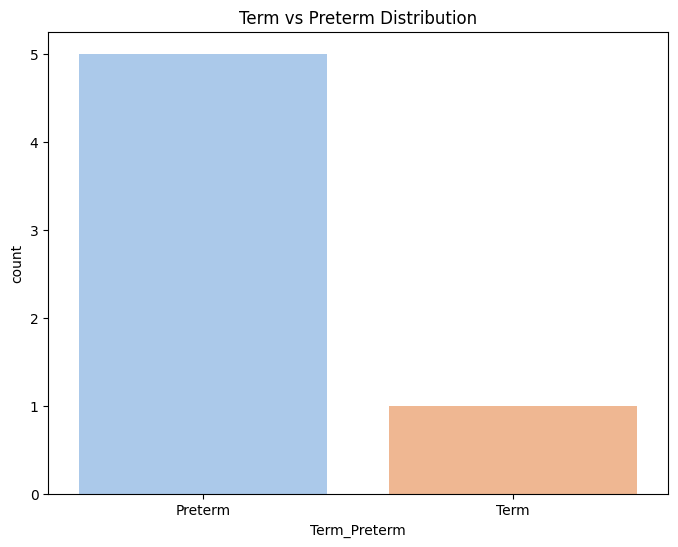

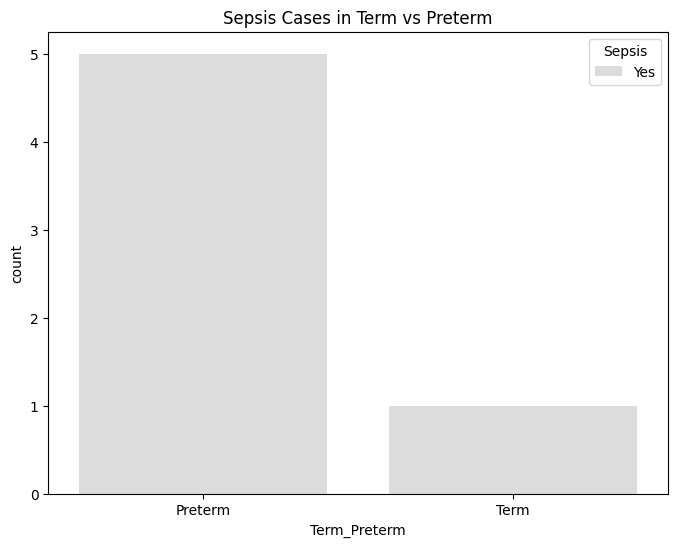

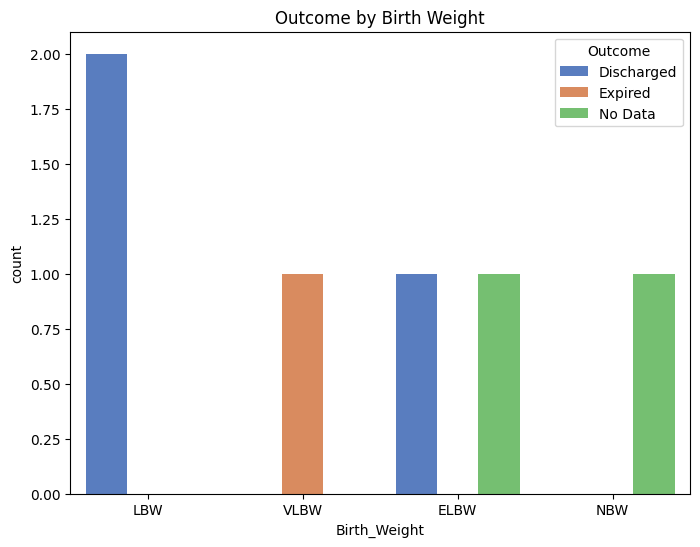

<ipython-input-6-d10543e2d75d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Sepsis'] == 'Yes'], x='Ventilation', palette='Set2')


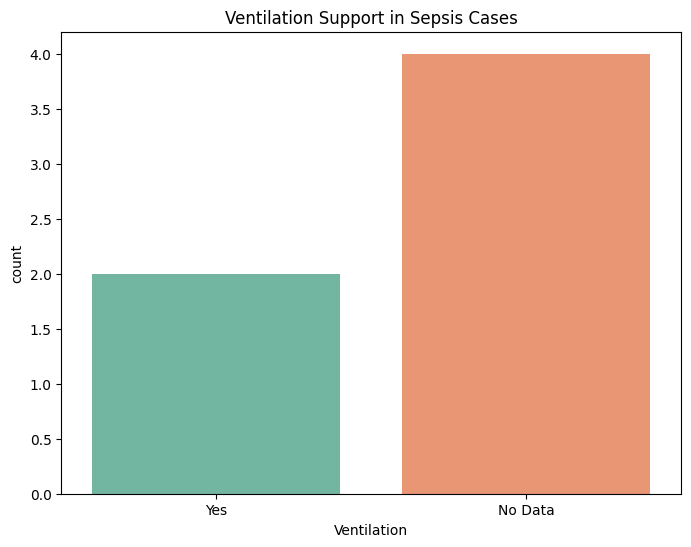

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a dictionary (replace with your file's path in Colab)
data = {
    'Strain_ID': ['AB0013', 'AB0014', 'AB0015', 'AB0016', 'AB0017', 'AB0018'],
    'Sex': ['Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
    'Term_Preterm': ['Preterm', 'Preterm', 'Preterm', 'Preterm', 'Preterm','Term'],
    'Inborn_Outborn': ['Inborn'] * 5 + ['Outborn'],
    'Birth_Weight': ['LBW', 'VLBW', 'ELBW', 'ELBW', 'LBW', 'NBW'],
    'Sepsis': ['Yes'] * 6,
    'Ventilation': ['Yes', 'No Data', 'Yes', 'No Data', 'No Data', 'No Data'],
    'Outcome': ['Discharged', 'Expired', 'No Data', 'Discharged', 'Discharged',
                'No Data']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot 1: Term vs Preterm distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Term_Preterm', palette='pastel')
plt.title('Term vs Preterm Distribution')
plt.show()

# Plot 2: Sepsis in Term vs Preterm
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Term_Preterm', hue='Sepsis', palette='coolwarm')
plt.title('Sepsis Cases in Term vs Preterm')
plt.show()

# Plot 3: Outcome by Birth Weight
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Birth_Weight', hue='Outcome', palette='muted')
plt.title('Outcome by Birth Weight')
plt.show()

# Plot 4: Ventilation Support in Sepsis Cases
plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['Sepsis'] == 'Yes'], x='Ventilation', palette='Set2')
plt.title('Ventilation Support in Sepsis Cases')
plt.show()


# **# PART 3. CORRELATION STUDIES**

<ipython-input-7-46fd482c25ce>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = data[['Presence_of_OmpA', 'Presence_of_Ade_A', 'Presence_of_Ade_B', 'Presence_of_Ade_C']].applymap(lambda x: 1 if x == 'Yes' else 0)


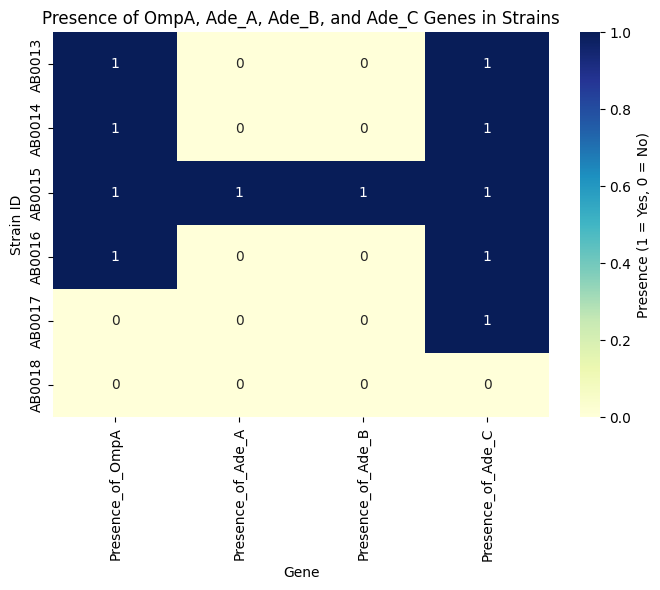

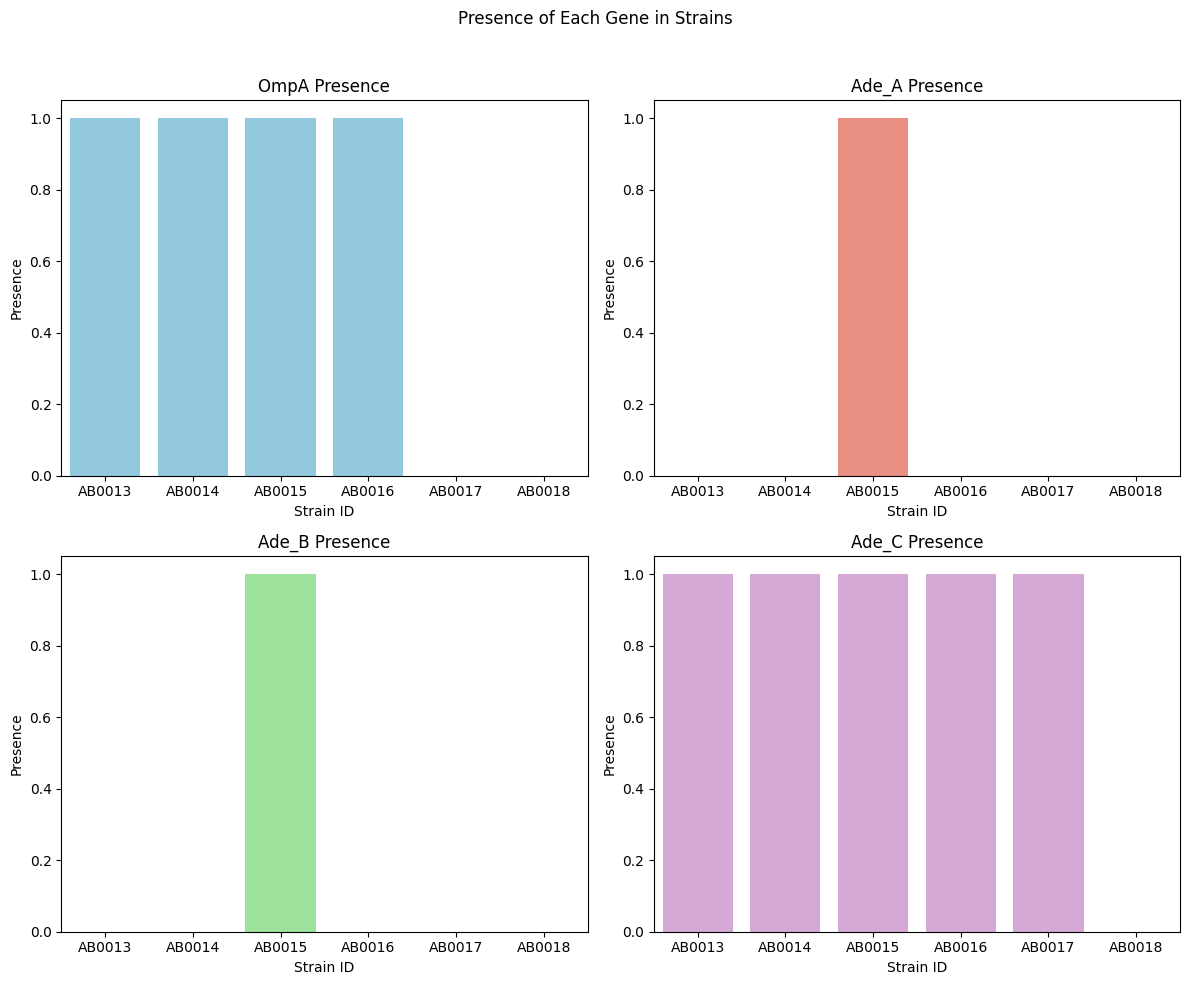

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.DataFrame({
    'Strain_ID': ['AB0013', 'AB0014', 'AB0015', 'AB0016', 'AB0017', 'AB0018'],
    'Presence_of_OmpA': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Presence_of_Ade_A': ['No', 'No', 'Yes', 'No', 'No', 'No'],
    'Presence_of_Ade_B': ['No', 'No', 'Yes', 'No', 'No', 'No'],
    'Presence_of_Ade_C': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
    'Sex': ['Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
    'Term_Preterm': ['Preterm', 'Preterm', 'Preterm', 'Preterm', 'Preterm', 'Term'],
    'Inborn_Outborn': ['Inborn', 'Inborn', 'Inborn', 'Inborn', 'Inborn', 'Outborn'],
    'Birth_Weight': ['LBW', 'VLBW', 'ELBW', 'ELBW', 'LBW', 'NBW'],
    'Sepsis': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Ventilation': ['Yes', 'No Data', 'Yes', 'No Data', 'No Data', 'No Data'],
    'Outcome': ['Discharged', 'Expired', 'No Data', 'Discharged', 'Discharged', 'No Data']
})

# Step 2: Prepare the data for plotting
# Convert 'Yes'/'No' to binary values (1 for 'Yes', 0 for 'No') for easier plotting
binary_data = data[['Presence_of_OmpA', 'Presence_of_Ade_A', 'Presence_of_Ade_B', 'Presence_of_Ade_C']].applymap(lambda x: 1 if x == 'Yes' else 0)

# Add strain ID as an index
binary_data.index = data['Strain_ID']

# Step 3: Plot the presence of each gene across samples

# Plot as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(binary_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Presence (1 = Yes, 0 = No)'})
plt.title("Presence of OmpA, Ade_A, Ade_B, and Ade_C Genes in Strains")
plt.xlabel("Gene")
plt.ylabel("Strain ID")
plt.show()

# Optional: Plot each gene individually as a bar chart
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Presence of Each Gene in Strains")

# Bar plot for each gene
sns.barplot(x=binary_data.index, y='Presence_of_OmpA', data=binary_data, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("OmpA Presence")
axes[0, 0].set_xlabel("Strain ID")
axes[0, 0].set_ylabel("Presence")

sns.barplot(x=binary_data.index, y='Presence_of_Ade_A', data=binary_data, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("Ade_A Presence")
axes[0, 1].set_xlabel("Strain ID")
axes[0, 1].set_ylabel("Presence")

sns.barplot(x=binary_data.index, y='Presence_of_Ade_B', data=binary_data, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Ade_B Presence")
axes[1, 0].set_xlabel("Strain ID")
axes[1, 0].set_ylabel("Presence")

sns.barplot(x=binary_data.index, y='Presence_of_Ade_C', data=binary_data, ax=axes[1, 1], color='plum')
axes[1, 1].set_title("Ade_C Presence")
axes[1, 1].set_xlabel("Strain ID")
axes[1, 1].set_ylabel("Presence")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
plt.show()


<ipython-input-8-ce50dc2692d7>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_antibiotic_data = antibiotic_data.set_index(['Antibiotic_Class', 'Antibiotic_action']).replace({'R': 1, 'S': 0})


Resistance Rates (%):
AB0013    50.0
AB0014    75.0
AB0015    75.0
AB0016    75.0
AB0017    75.0
AB0018    25.0
dtype: float64


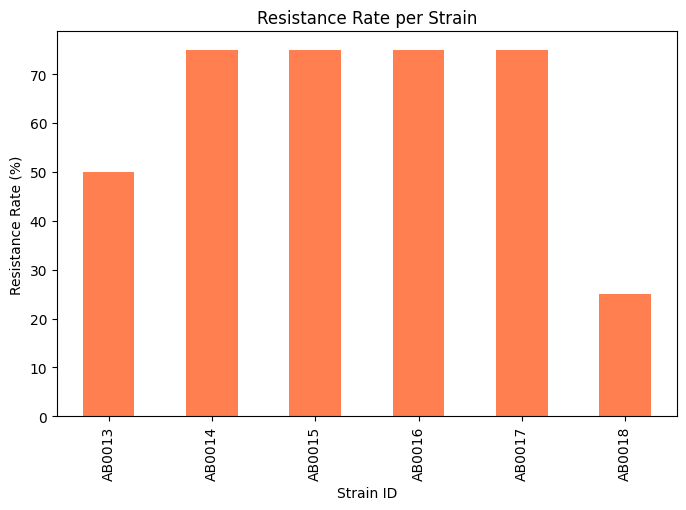

<ipython-input-8-ce50dc2692d7>:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_gene_data = data[['Presence_of_OmpA', 'Presence_of_Ade_A', 'Presence_of_Ade_B', 'Presence_of_Ade_C']].applymap(lambda x: 1 if x == 'Yes' else 0)


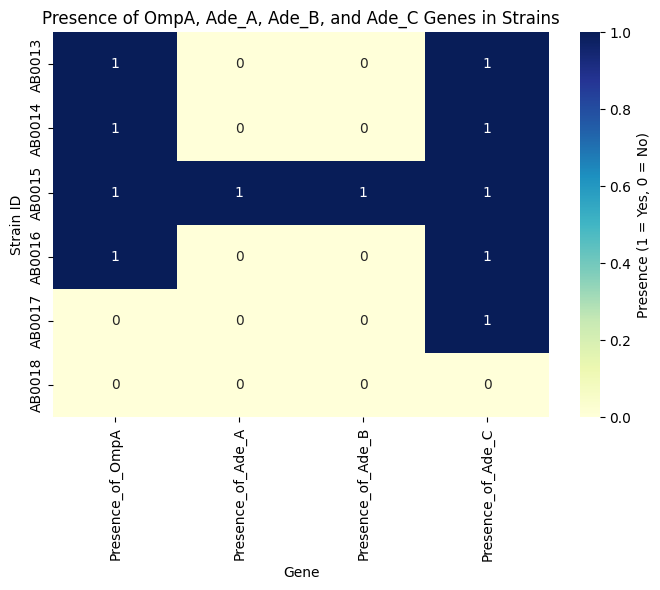

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the initial gene expression dataset
data = pd.DataFrame({
    'Strain_ID': ['AB0013', 'AB0014', 'AB0015', 'AB0016', 'AB0017', 'AB0018'],
    'Presence_of_OmpA': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Presence_of_Ade_A': ['No', 'No', 'Yes', 'No', 'No', 'No'],
    'Presence_of_Ade_B': ['No', 'No', 'Yes', 'No', 'No', 'No'],
    'Presence_of_Ade_C': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

# Step 2: Add antibiotic resistance data
antibiotic_data = pd.DataFrame({
    'Antibiotic_Class': ['Cephalosporin', 'Monolactam', 'Carbapenem', 'Aminoglycoside', 'Penicillin',
                         'Fluoroquinolone', 'Tetracycline', 'Glycylcycline'],
    'Antibiotic_action': ['Cell wall synthesis', 'Cell wall synthesis', 'Cell wall synthesis',
                          'Protein Synthesis, 30S Subunit', 'Cell wall synthesis',
                          'Topoisomerase inhibitor', 'Protein Synthesis, 30S Subunit',
                          'Protein Synthesis, 30S Subunit'],
    'AB0013': ['R', 'R', 'R', 'S', 'R', 'S', 'S', 'S'],
    'AB0014': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0015': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0016': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0017': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0018': ['S', 'S', 'R', 'S', 'R', 'S', 'S', 'S']
})

# Step 3: Convert 'R'/'S' to binary values (1 for Resistance, 0 for Sensitive) for easier analysis
binary_antibiotic_data = antibiotic_data.set_index(['Antibiotic_Class', 'Antibiotic_action']).replace({'R': 1, 'S': 0})

# Step 4: Calculate resistance rates (percentage of resistance) for each strain
resistance_rates = binary_antibiotic_data.mean(axis=0) * 100  # Multiply by 100 to get percentages
print("Resistance Rates (%):")
print(resistance_rates)

# Step 5: Plot resistance rate per strain
plt.figure(figsize=(8, 5))
resistance_rates.plot(kind='bar', color='coral')
plt.title("Resistance Rate per Strain")
plt.xlabel("Strain ID")
plt.ylabel("Resistance Rate (%)")
plt.show()

# Step 6: Visualize gene presence
# Convert gene presence data to binary (1 for 'Yes', 0 for 'No')
binary_gene_data = data[['Presence_of_OmpA', 'Presence_of_Ade_A', 'Presence_of_Ade_B', 'Presence_of_Ade_C']].applymap(lambda x: 1 if x == 'Yes' else 0)
binary_gene_data.index = data['Strain_ID']

# Plot gene presence as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(binary_gene_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Presence (1 = Yes, 0 = No)'})
plt.title("Presence of OmpA, Ade_A, Ade_B, and Ade_C Genes in Strains")
plt.xlabel("Gene")
plt.ylabel("Strain ID")
plt.show()


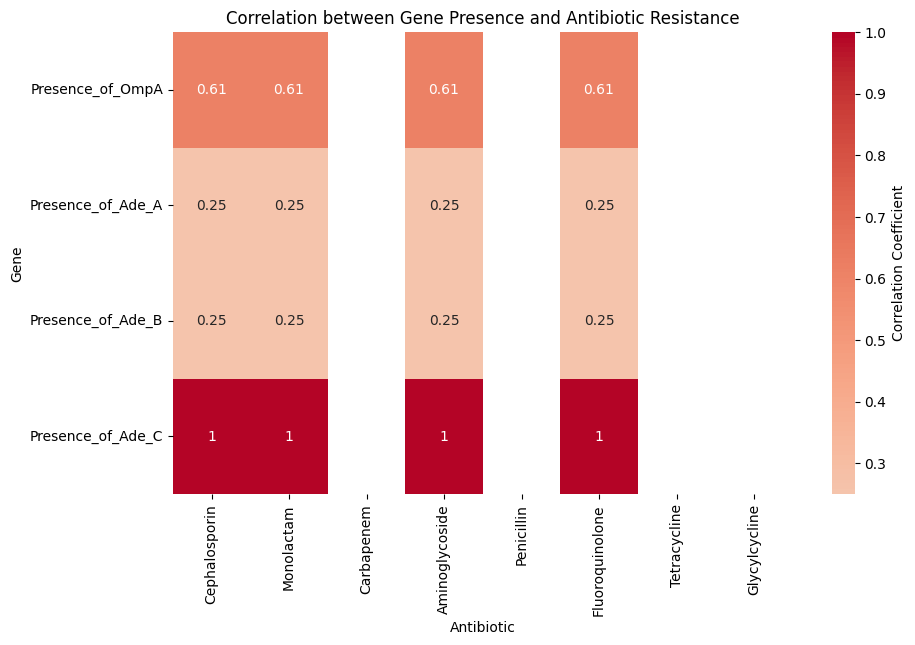

In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the gene and resistance datasets
# Gene presence dataset
gene_data = {
    'Strain_ID': ['AB0013', 'AB0014', 'AB0015', 'AB0016', 'AB0017', 'AB0018'],
    'Presence_of_OmpA': [1, 1, 1, 1, 0, 0],  # 'Yes' mapped to 1, 'No' mapped to 0
    'Presence_of_Ade_A': [0, 0, 1, 0, 0, 0],
    'Presence_of_Ade_B': [0, 0, 1, 0, 0, 0],
    'Presence_of_Ade_C': [1, 1, 1, 1, 1, 0],
    'Sex': ['Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
    'Term_Preterm': ['Preterm', 'Preterm', 'Preterm', 'Preterm', 'Preterm', 'Term'],
    'Inborn_Outborn': ['Inborn'] * 5 + ['Outborn'],
    'Birth_Weight': ['LBW', 'VLBW', 'ELBW', 'ELBW', 'LBW', 'NBW'],
    'Sepsis': ['Yes'] * 6,
    'Ventilation': ['Yes', 'No Data', 'Yes', 'No Data', 'No Data', 'No Data'],
    'Outcome': ['Discharged', 'Expired', 'No Data', 'Discharged', 'Discharged', 'No Data']
}
gene_df = pd.DataFrame(gene_data)

# Antibiotic resistance dataset
resistance_data = {
    'Antibiotic Class': ['Cephalosporin', 'Monolactam', 'Carbapenem', 'Aminoglycoside',
                         'Penicillin', 'Fluoroquinolone', 'Tetracycline', 'Glycylcycline'],
    'Antibiotic action': ['Cell wall synthesis', 'Cell wall synthesis', 'Cell wall synthesis',
                          'Protein Synthesis, 30S Subunit', 'Cell wall synthesis',
                          'Topoisomerase inhibitor', 'Protein Synthesis, 30S Subunit',
                          'Protein Synthesis, 30S Subunit'],
    'AB0013': ['R', 'R', 'R', 'S', 'R', 'S', 'S', 'S'],
    'AB0014': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0015': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0016': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0017': ['R', 'R', 'R', 'R', 'R', 'R', 'S', 'S'],
    'AB0018': ['S', 'S', 'R', 'S', 'R', 'S', 'S', 'S']
}
resistance_df = pd.DataFrame(resistance_data)

# Step 2: Transpose resistance data for easier merging and label conversion
# Drop the first two columns as they are not needed for correlation
resistance_df_transposed = resistance_df.set_index('Antibiotic Class').iloc[:, 2:].T.reset_index()
resistance_df_transposed.columns.name = None
resistance_df_transposed.columns = ['Strain_ID'] + list(resistance_df['Antibiotic Class'])

# Step 3: Merge gene presence data with resistance data
merged_data = pd.merge(gene_df, resistance_df_transposed, on='Strain_ID', how='inner')

# Step 4: Convert 'R' and 'S' to numeric (1 for Resistance, 0 for Sensitivity)
for col in resistance_df['Antibiotic Class']:
    merged_data[col] = merged_data[col].map({'R': 1, 'S': 0})

# Step 5: Calculate correlations between gene presence and resistance to each antibiotic
# Ensure only numeric columns are used for correlation calculations
numeric_data = merged_data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr(method='pearson')  # or method='spearman' for non-linear

# Specify columns for genes and antibiotics
gene_columns = ['Presence_of_OmpA', 'Presence_of_Ade_A', 'Presence_of_Ade_B', 'Presence_of_Ade_C']
antibiotic_columns = resistance_df['Antibiotic Class']

# Extract the correlation between genes and antibiotic resistance columns
gene_resistance_correlation = correlation_matrix.loc[gene_columns, antibiotic_columns]

# Step 6: Plot the correlation matrix
if not gene_resistance_correlation.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(gene_resistance_correlation, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title("Correlation between Gene Presence and Antibiotic Resistance")
    plt.xlabel("Antibiotic")
    plt.ylabel("Gene")
    plt.show()
else:
    print("Error: The gene_resistance_correlation matrix is empty. Please check the column names and data.")
